In [1]:
import os
import shutil
import re
import matplotlib.pyplot as plt
import csv

In [2]:
directory='/Users/susmoy.das/transit-models/Port_Model_sample'

In [3]:
with open(directory+'/Queries.txt', 'r') as f:
    lines = f.readlines()
f.close()
formula={}
i=1
j=1
for line in lines:
    if ';' not in line:
        formula[str(j)]=line.strip()
        j+=1
print(formula)
np=j
# print(np)

{'1': 'P=? [F<=t ("ncars_1" & !"ncars_2")]', '2': 'P=? [F<=t ("ncars_2" & !"ncars_3")]', '3': 'P=? [F<=t ("ntrucks_1" & !"ntrucks_2")]', '4': 'P=? [F<=t ("ntrucks_2" & !"ntrucks_3")]', '5': 'P=? [F<=t !("ncars_1")]', '6': 'P=? [F<=t !("ncars_2")]', '7': 'P=? [F<=t !("ntrucks_1")]', '8': 'P=? [F<=t !("ntrucks_2")]', '9': 'P=? [F<=t (!"ncars_1" & !"ntrucks_1")]', '10': 'P=? [F<=t (!"ncars_2" & !"ntrucks_2")]', '11': 'P=? [F<=t ("load_in_ship_1")]', '12': 'P=? [F<=t ("load_in_ship_2")]', '13': 'P=? [F<=t ("load_in_ship_3")]', '14': 'filter(avg, P=? [F<=t ("load_in_ship_1")], "empty_berth")', '15': 'filter(avg, P=? [F<=t ("load_in_ship_2")], "empty_berth")', '16': 'filter(avg, P=? [F<=t ("load_in_ship_3")], "empty_berth")', '17': 'P=? [F<=t ("ncars_in_ship_1")]', '18': 'P=? [F<=t ("ncars_in_ship_2")]', '19': 'P=? [F<=t ("ntrucks_in_ship_1")]', '20': 'P=? [F<=t ("ntrucks_in_ship_2")]', '21': 'filter(state, P=? [ F <=t ("ship_full1" | "ship_full2") ], x=j)'}


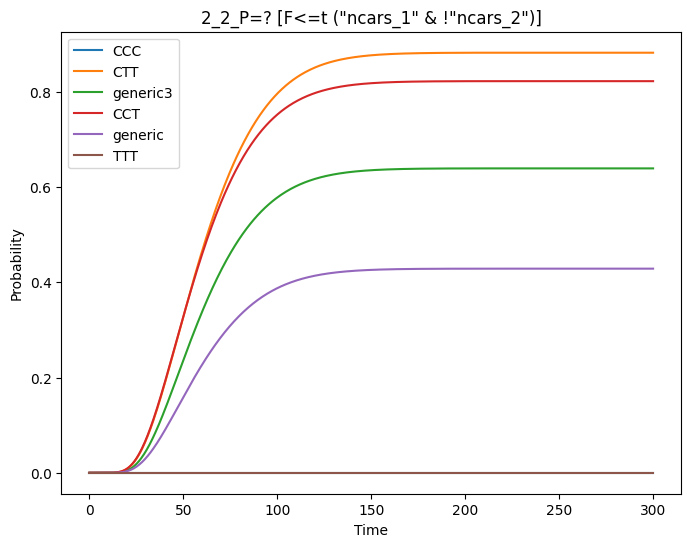

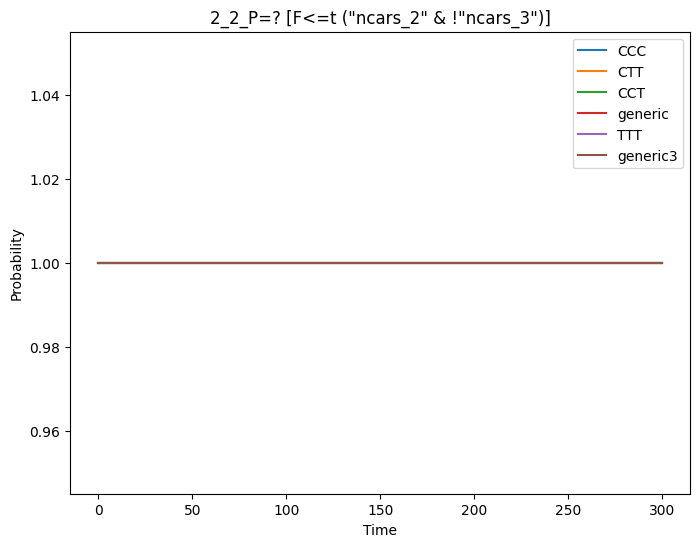

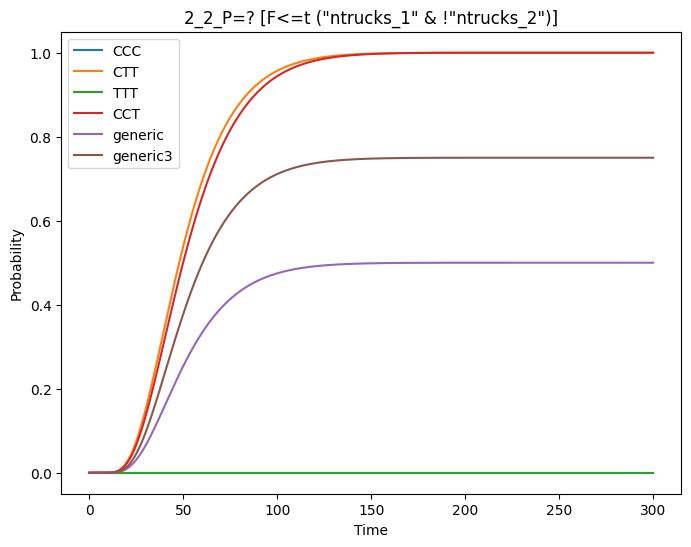

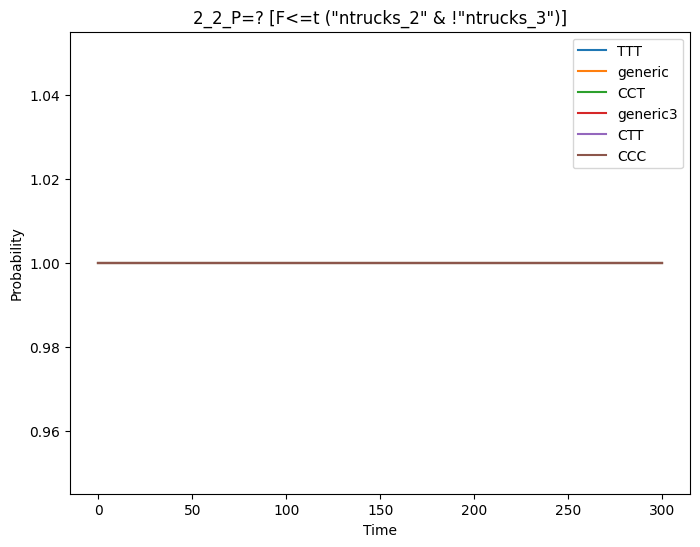

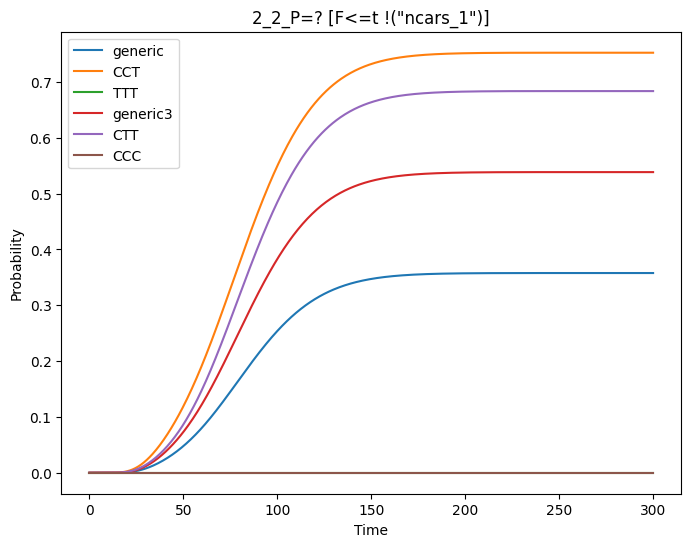

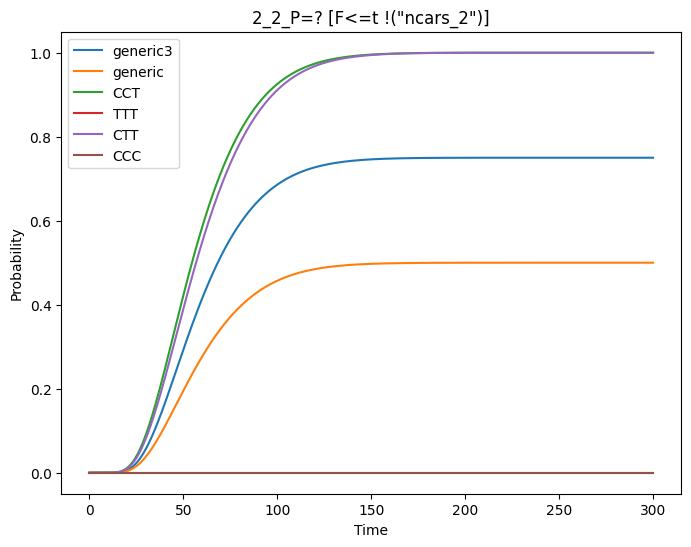

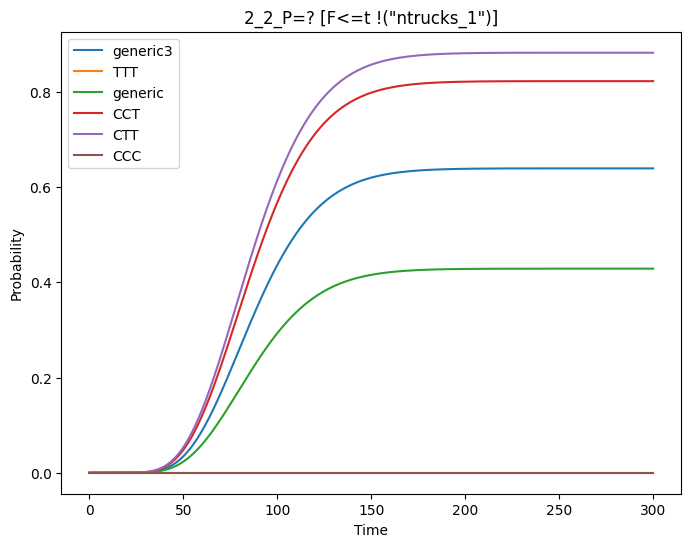

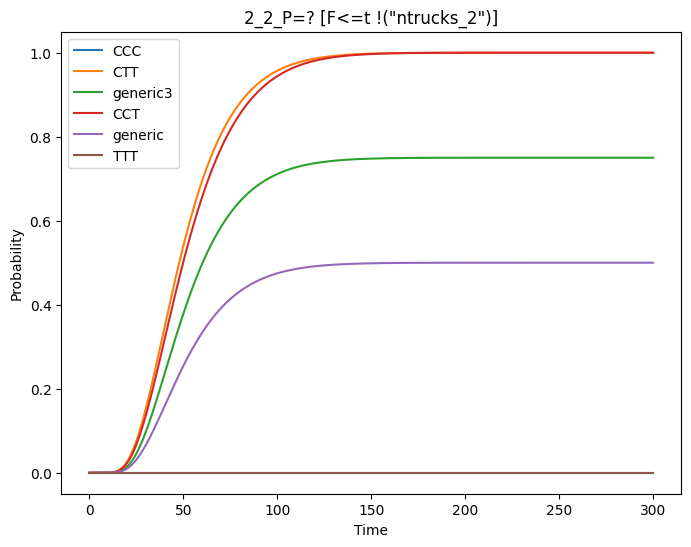

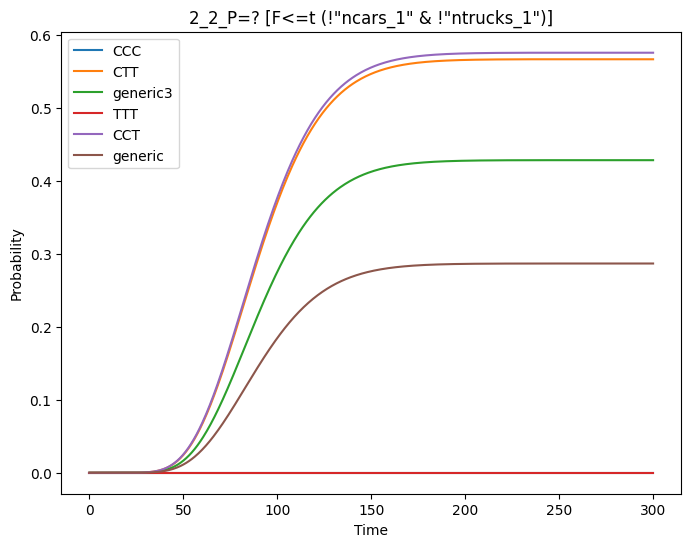

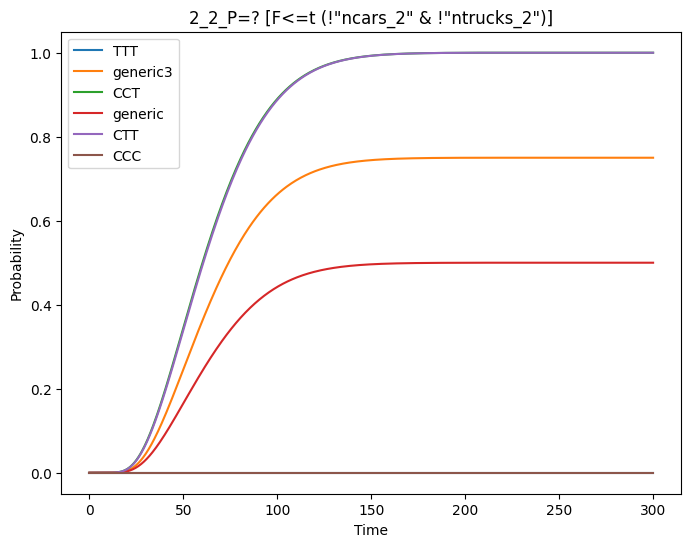

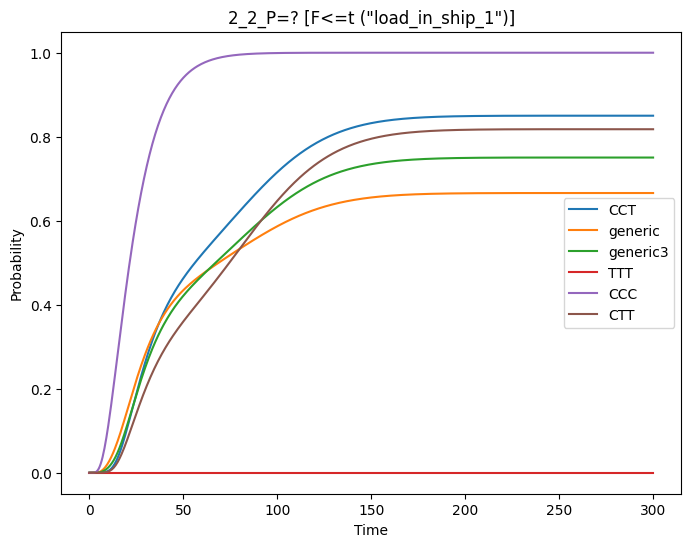

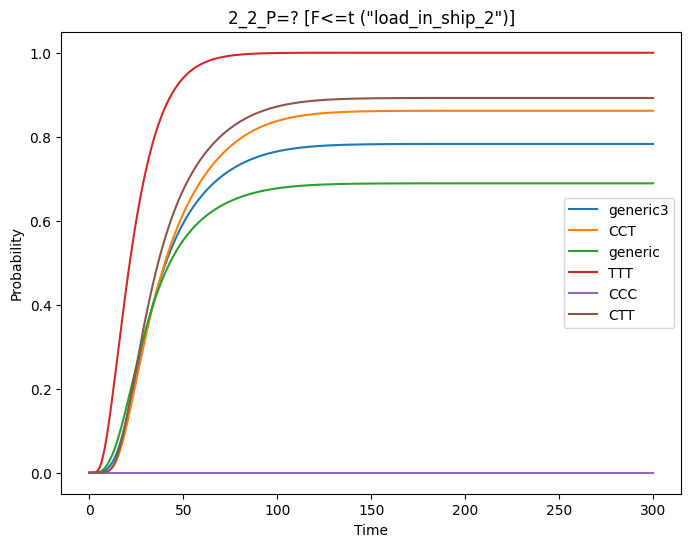

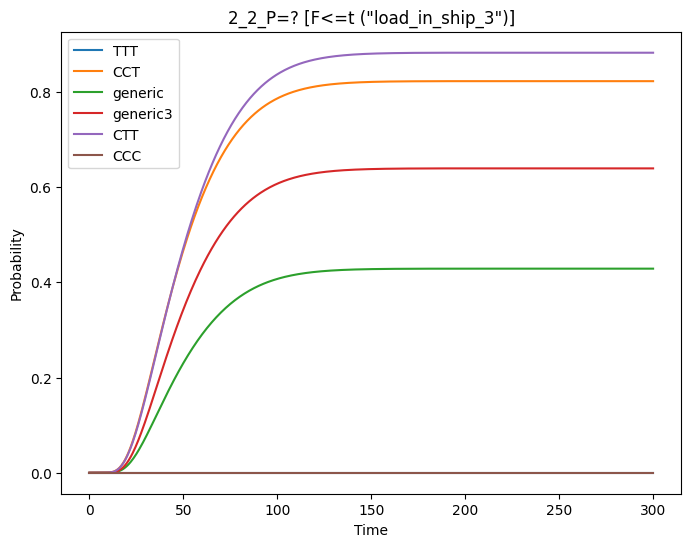

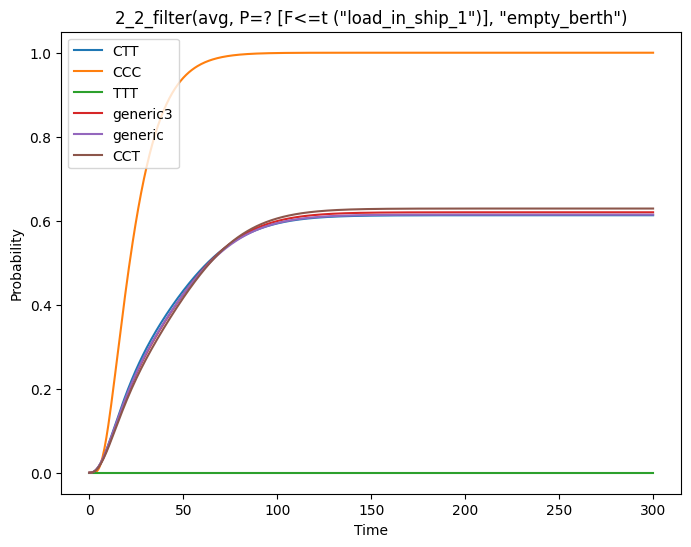

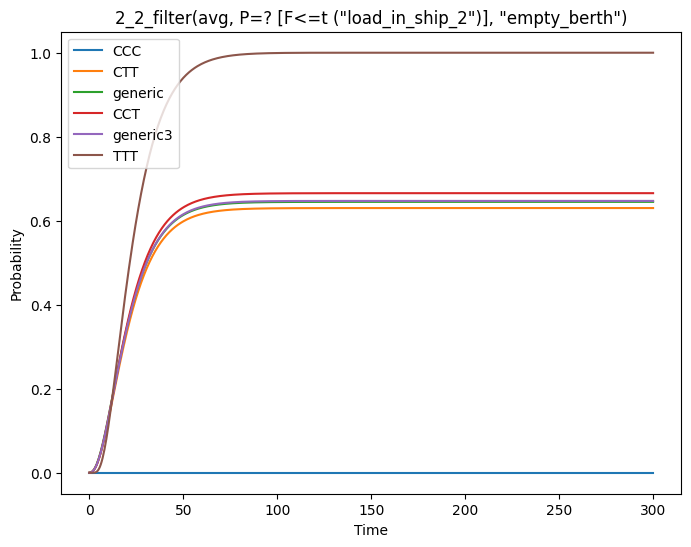

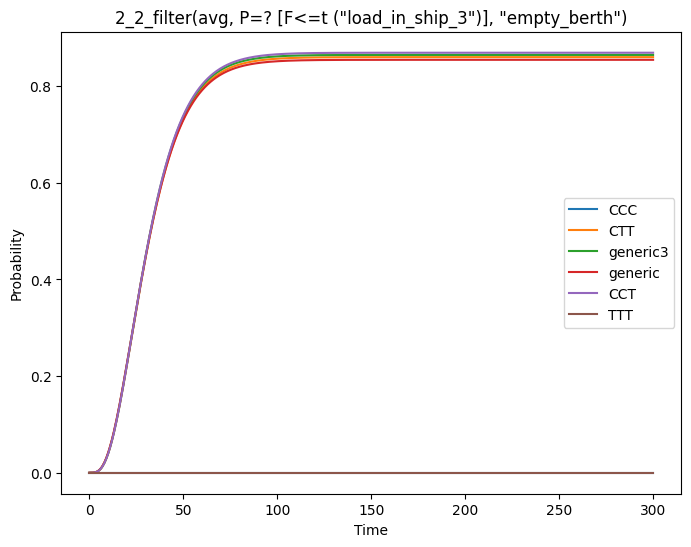

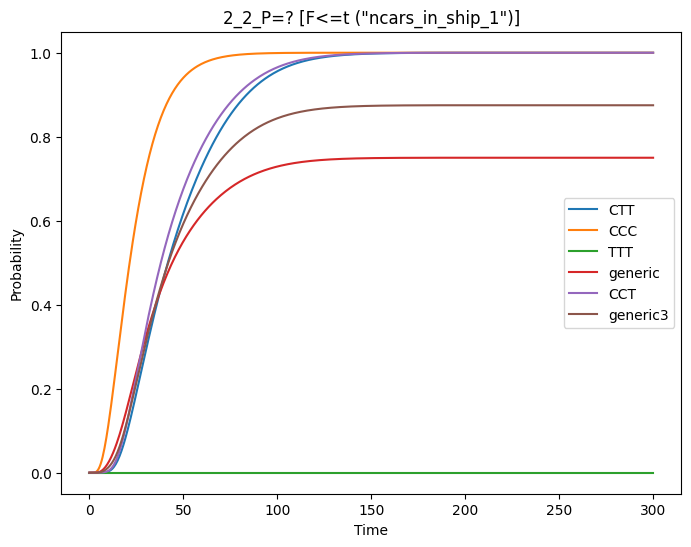

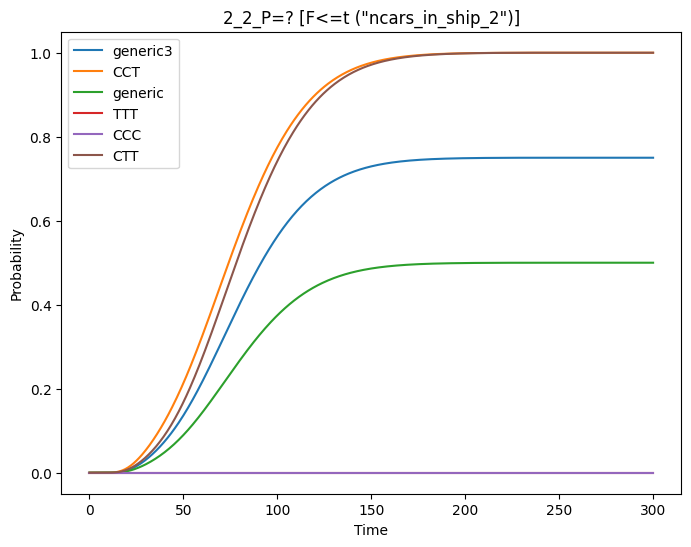

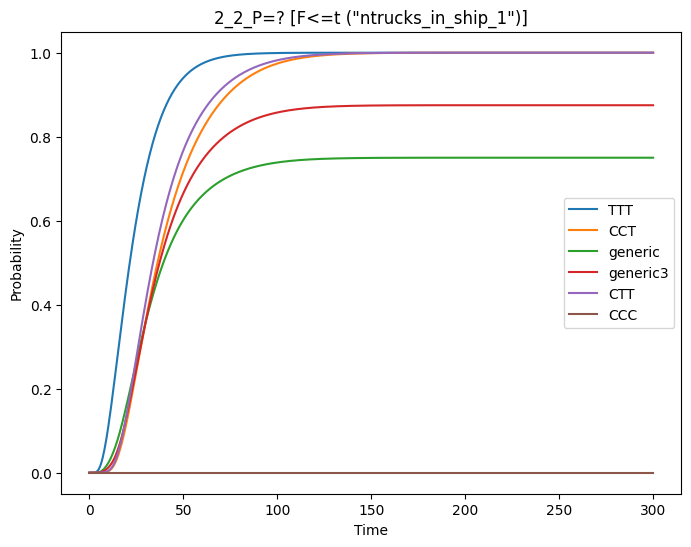

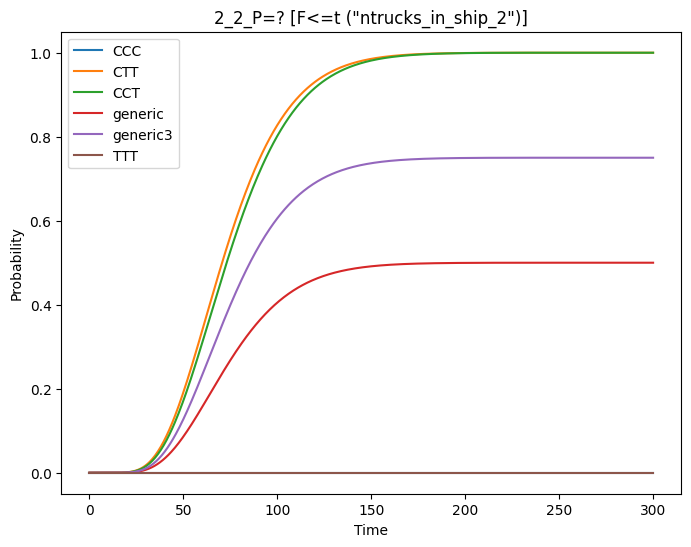

In [4]:
for i in range(1,np+1):
    X=[]
    Y=[]
    labels=[]
    for filename in os.listdir(directory):
        if filename.endswith('_csv.txt'):
            a=filename.split('.')[0].split('_')
            if int(a[-2])==i:
                x = []  
                y = [] 
                with open(filename, 'r') as file:
                    reader = csv.reader(file)
                    next(reader) 
                    for row in reader:
                        x.append(float(row[0]))  
                        y.append(float(row[1]))
                    Y.append(y)
                    labels.append(a[-3])
                X.append(x)
    if len(X)>0 and len(Y)>0:
        plt.figure(figsize=(8, 6))
        for y,labels in zip(Y,labels):
            plt.plot(x, y, label=labels)
        plt.xlabel('Time')
        plt.ylabel('Probability')
        plt.title('2_2_'+formula[str(i)])
        plt.legend()
        plt.savefig(directory+'/Plots/'+'2_2_'+formula[str(i)]+'.png', dpi=300)  
        plt.show()

In [5]:
# import matplotlib.pyplot as plt
# import csv

# for i in range(cs,ce+1):
#     for j in range(ts,te+1):
#         for k in range(1,np+1):
#             X=[]
#             Y=[]
#             labels=[]
#             os.chdir(directory+'/'+str(i)+'_'+str(j)+'/'+str(k))
#             for filename in os.listdir(directory+'/'+str(i)+'_'+str(j)+'/'+str(k)):
#                 x = []  
#                 y = [] 
#                 with open(filename, 'r') as file:
#                     reader = csv.reader(file)
#                     next(reader) 
#                     for row in reader:
#                         x.append(float(row[0]))  
#                         y.append(float(row[1]))
#                     Y.append(y)
#                     a=filename.split('.')[0].split('_')
#                     labels.append(a[4][0]+a[5][0]+a[6][0]+a[7][0])
#                 X.append(x)
#             plt.figure(figsize=(8, 6))
#             for y,labels in zip(Y,labels):
#                 plt.plot(x, y, label=labels)
#             plt.xlabel('Time')
#             plt.ylabel('Probability')
#             plt.title(a[2]+'_'+a[3]+' : '+formula[a[8]])
#             plt.legend()
#             plt.savefig(a[2]+'_'+a[3]+'_'+a[8]+'.png', dpi=300)  
#             plt.show()
